# What are Time Series and Forecasting

Forecasting a time series is technically a supervised learning regression task, but there are some nuances to this task that have led to the development of an additional subclass of statistical and machine learning methods.

## What we will accomplish

In this notebook we will:
- Define time series,
    - Provide some examples,
- Introduce the concept of a trend,
- Present the concept of seasonality and
- Explain forecasting.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

from datetime import datetime

set_style("whitegrid")

## Time series data

A <i>time series</i> is a sequence of data points $(X_1, y_1), (X_2, y_2), \dots (X_t, y_t) \dots$ where $X_t$ represents a collection of $m$ features and $y_t$ represents a numeric variable of interest at time $t$. For the purposes of these notes we will assume that our time steps are evenly spaced. Depending on the model and data set we may make additional assumptions on the $X_t$ and $y_t$.

A slight departure from our regression data set up is that a time series may or may not come with a set of features. That is, if you work on forecasting problems it is possible that you will encounter data sets of the form $y_1, y_2, \dots, y_T$ with no corresponding $X_1, X_2, \dots, X_T$.

As we will soon see this fact and the sequential nature of our data will impact our approach to predictive modeling for these data.

### Examples

Some examples of time series data include:
- Average global temperatures over the past 200 years,
- The value of the SNP500 index,
- Daily new cases of seasonal influenza in the United States of American since 1900 and
- Yearly Boston marathon times.

### Features of time series data

There are two features of time series that may be of interest to us.

#### Trends

A time series is said to exhibit a <i>trend</i> if the values, $y_t$, tend to increase (or decrease) over time (as $t$ increases).

One such example can be found with Google's parent company's stock closing price.

In [4]:
goog = pd.read_csv("../../data/google_stock.csv", parse_dates=['date'])

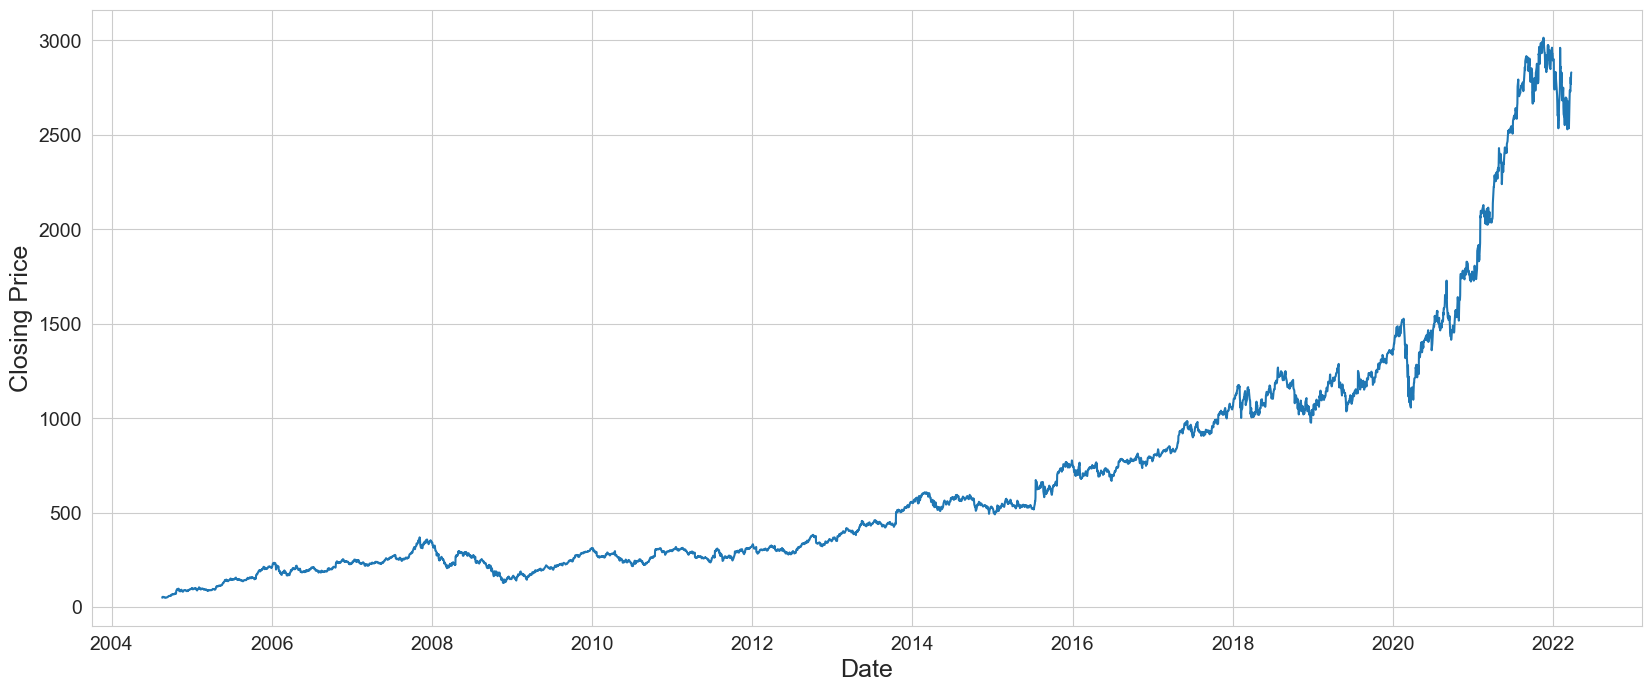

In [5]:
plt.figure(figsize=(20,8))

plt.plot(goog.date, goog.closing_price)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

This time series exhibits a positive or increasing trend as time goes on.

We should note, however, that we have to be careful when examining time series plots for trends. The time window we consider can greatly impact our conclusions.

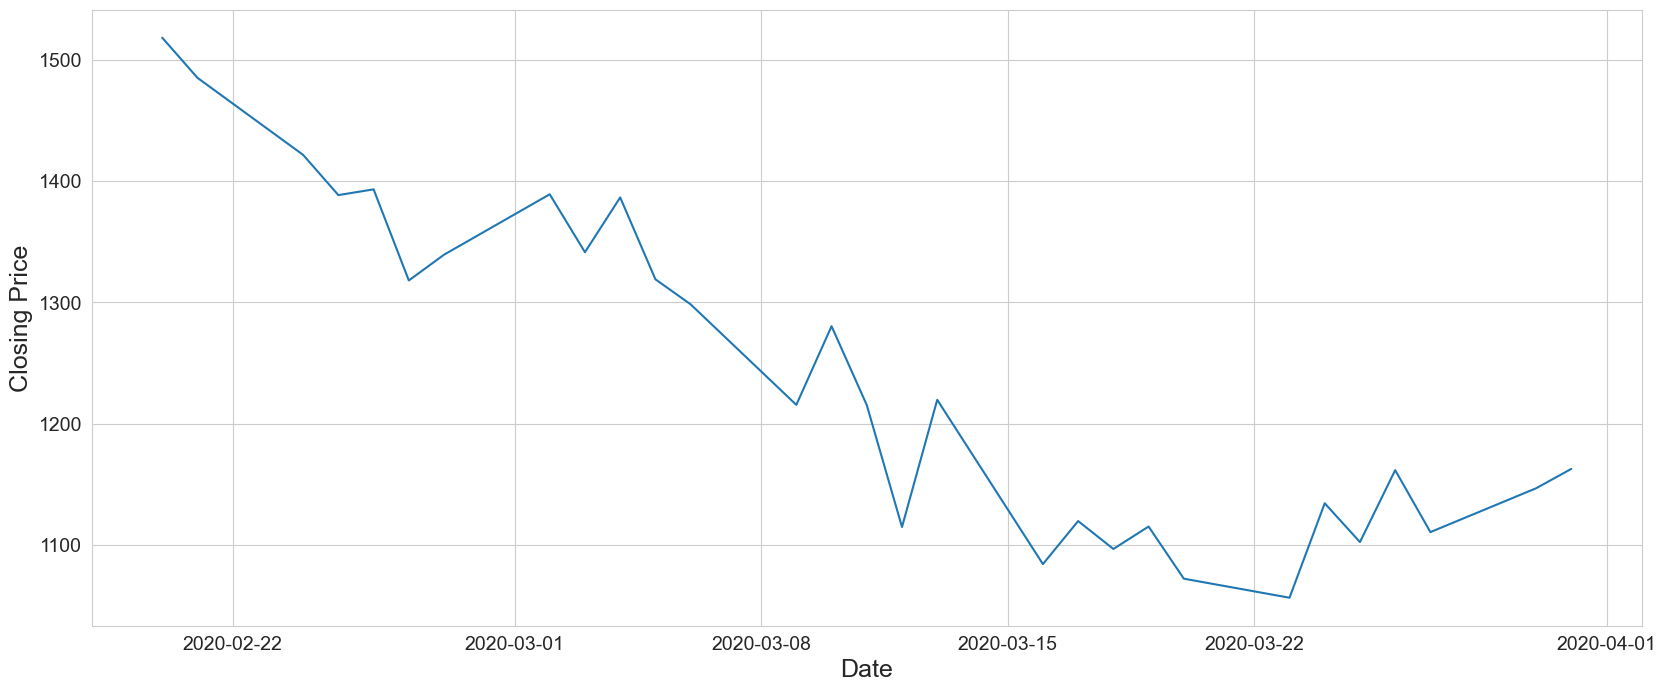

In [6]:
plt.figure(figsize=(20,8))

plt.plot(goog.loc[(goog.date >= datetime(2020, 2, 20)) &
                  (goog.date < datetime(2020,4,1))].date, 
         goog.loc[(goog.date >= datetime(2020, 2, 20)) &
                  (goog.date < datetime(2020,4,1))].closing_price)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Now there appears to be a negative trend.

#### Seasonality

A time series is said to exhibit <i>seasonality</i> if the value of $y_t$ demonstrates a repeating pattern of some fixed length over time. One way to think of this is a sinusoidal wave:

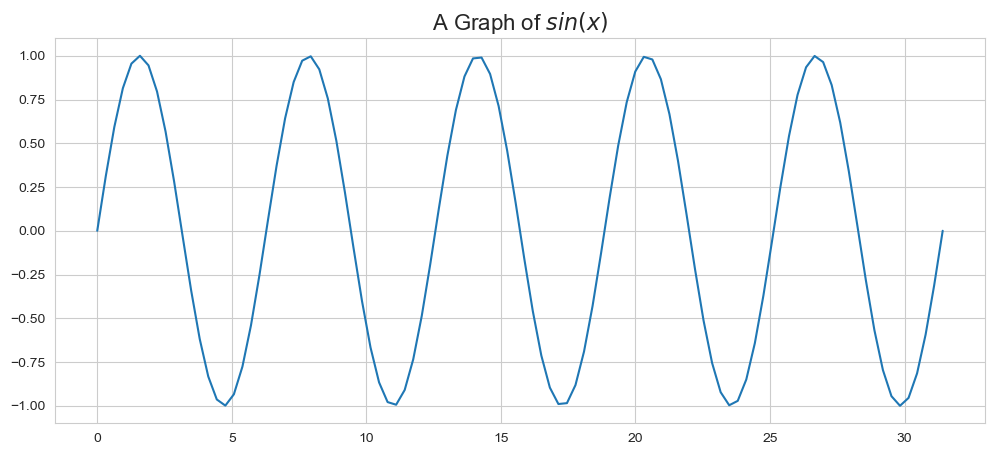

In [7]:
plt.figure(figsize=(12,5))

plt.plot(np.linspace(0, 10*np.pi, 100),
            np.sin(np.linspace(0, 10*np.pi, 100)))

plt.title("A Graph of $sin(x)$", fontsize=16)

plt.show()

however this is not the only repeating pattern.

One example is that of influenza prevalence/incidence. Flu season in the United States (at least prior to COVID-19) follows a fairly regular pattern where cases start to slowly increase in late October/early November, increase more rapidly in December/January peak around January/February and then decrease to be close to $0%$ by April or so.

Here are the weekly new cases (known as weekly incidence) of seasonal influenza in the United States from 1928 to 1948 thanks to data from <a href="https://www.tycho.pitt.edu/">Project Tycho</a>.

In [9]:
flu = pd.read_csv("../../data/us_flu_1928_1948.csv", parse_dates=['date'])

In [10]:
type(flu.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
flu.loc[flu.date <= datetime(1931, 2, 1)]

,date,year,week,cases
0,1928-01-01,1928,1,2938
1,1928-01-08,1928,2,3343
2,1928-01-15,1928,3,3208
3,1928-01-22,1928,4,3118
4,1928-01-29,1928,5,3743
...,...,...,...,...
156,1931-01-04,1931,1,3231
157,1931-01-11,1931,2,4555
158,1931-01-18,1931,3,9842
159,1931-01-25,1931,4,15633


In [12]:
from datetime import datetime, timedelta

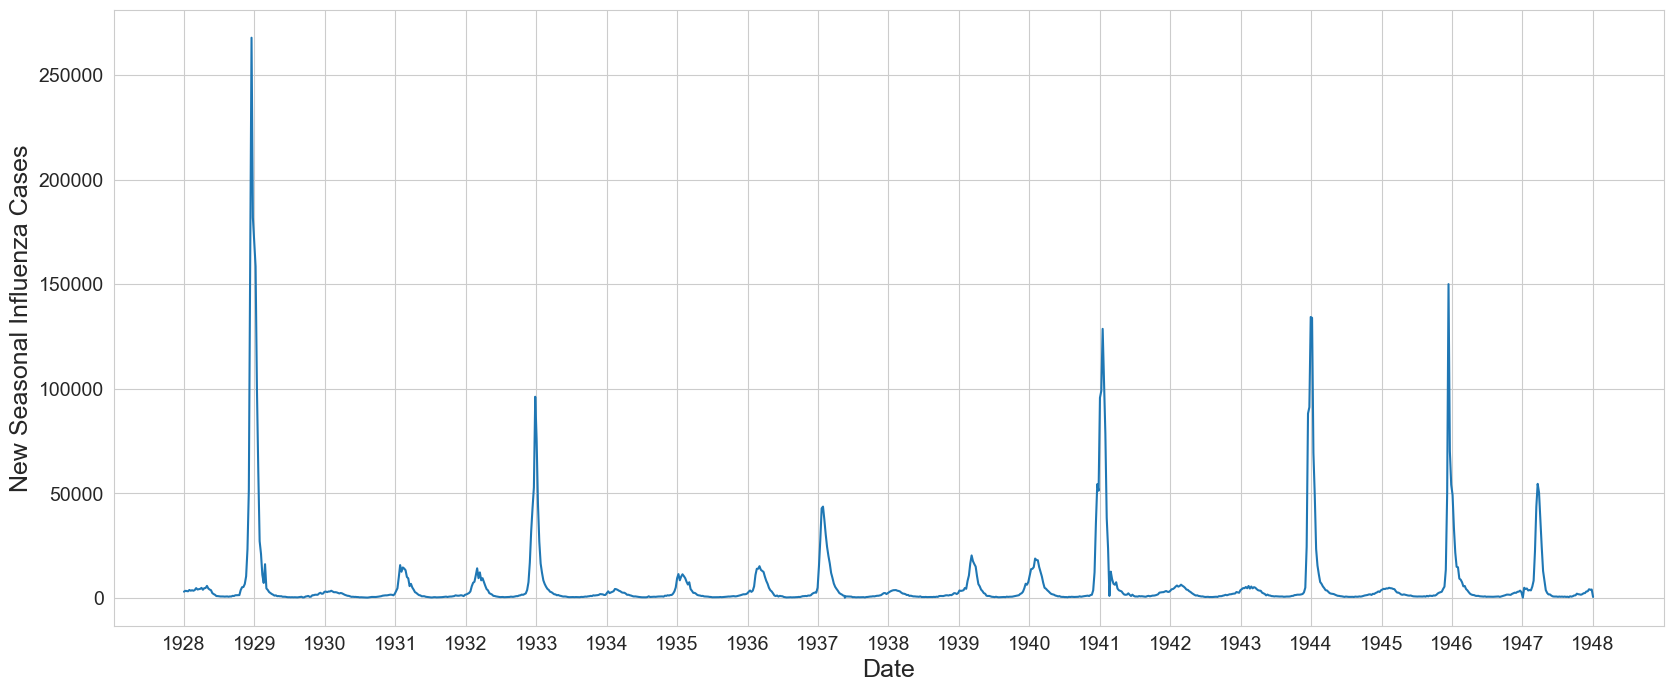

In [13]:
plt.figure(figsize=(20,8))

plt.plot(flu.date, flu.cases)

plt.xlabel("Date", fontsize=18)
plt.ylabel("New Seasonal Influenza Cases", fontsize=18)

plt.xticks([datetime(1928,1,1) + timedelta(days=365*i) for i in range(21)],
           [str(i) for i in range(1928, 1949)],
           fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## Forecasting

<i>Forecasting</i> is what we call the act of predicting future values of a time series.

Recall the supervised learning framework we have previously discussed:

$$
y = f(X) + \epsilon.
$$

In forecasting we make some slight adjustments to this framework that take the temporal nature of these data into account:

$$
y_T = f(X_T,T|y_{T-1}, y_{T-2}, \dots, y_1) + \epsilon_T.
$$

This set up could be referred to as a conditional prediction, where we want to know the value of $y_T$ given what we know about all preceding values. We should also note that the random error here may be dependent upon the time and that, as we mentioned earlier, we may not have features, $X_T$.

This different set up means that we will have to make a few more adjustments to processes like data splits and cross-validation.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)